In [1]:
#https://github.com/vic22981106/RNN_BinaryAdditionTask/blob/master/RNN_BinaryAdditionTask.ipynb

# import the packages that I need
import numpy as np
import matplotlib.pyplot as plt

# sigmoid function and its derivative
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def sigmoid_derivative(output):
    return output*(1-output)

# let the randomization different every time
a = np.random.randint(1,100)
np.random.seed(a)

# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]

epoch = 20000
lr = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

# initialize neural network weights
W_inputtohidden = 2*np.random.random((input_dim,hidden_dim)) - 1 #najistotniejsza
W_hiddenToOutput = 2*np.random.random((hidden_dim,output_dim)) - 1 #najmniej istotna
W_hiddenTohidden = 2*np.random.random((hidden_dim,hidden_dim)) - 1 #pośrednia

# generate 3 lists to store the upcoming gradients
W_inputtohidden_update = np.zeros_like(W_inputtohidden)
W_hiddenToOutput_update = np.zeros_like(W_hiddenToOutput)
W_hiddenTohidden_update = np.zeros_like(W_hiddenTohidden)

allError=[]
Acc = []
# training logic
for j in range(epoch):
    # generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # binary version of a
    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # binary verions of b

    # true answer
    c_int = a_int + b_int # int version of c
    c = int2binary[c_int] # binary version of c

    # i generate an array d for the best answer given by the machine (binary version)
    d = np.zeros_like(c)
    overallError = 0

    outputlayer_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(hidden_dim))

    # moving along the positions in the binary encoding
    for position in range(binary_dim):
        # generate input and output , move from right to left
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        # forward propagation
        hidden=sigmoid(np.dot(X,W_inputtohidden) + np.dot(hidden_values[-1],W_hiddenTohidden))
        # output layer (new binary representation)
        outputlayer = sigmoid(np.dot(hidden,W_hiddenToOutput))

        # calculate the loss value
        outputlayer_error = y - outputlayer
        outputlayer_deltas.append((outputlayer_error)*sigmoid_derivative(outputlayer)*(-1))
        Error = ((outputlayer_error)**2)/2
        print('error: {}'.format(Error))

        # decode estimate
        # print("The OutputLayer (binary version): ",outputlayer[0][0])
        d[binary_dim - position - 1] = np.round(outputlayer[0][0])

        # store hidden layer foro BPTT
        hidden_values.append(hidden)

    # generate an array to store the hidden and hidden_delta at t + 1 for BPTT
    future_hidden_delta = np.zeros(hidden_dim)
    future_hidden = np.zeros(hidden_dim)

    for position in range(binary_dim):
        X = np.array([[a[position],b[position]]])
        hidden = hidden_values[-position-1]
        prev_hidden = hidden_values[-position-2]

        # error at output layer
        outputlayer_delta = outputlayer_deltas[-position-1]

        # error at hidden layer * sigmoid_derivative(future_hidden)
        hidden_delta = (future_hidden_delta.dot(W_hiddenTohidden.T) *
                        sigmoid_derivative(future_hidden) +
                        outputlayer_delta.dot(W_hiddenToOutput.T)) * \
                       sigmoid_derivative(hidden)

        # update all weights
        W_hiddenToOutput_update += np.atleast_2d(hidden).T.dot(outputlayer_delta)
        W_hiddenTohidden_update += np.atleast_2d(prev_hidden).T.dot(hidden_delta)
        W_inputtohidden_update += X.T.dot(hidden_delta)
        future_hidden_delta = hidden_delta
        future_hidden = hidden

    W_inputtohidden -= W_inputtohidden_update * lr
    W_hiddenToOutput -= W_hiddenToOutput_update * lr
    W_hiddenTohidden -= W_hiddenTohidden_update * lr

    W_inputtohidden_update *= 0
    W_hiddenToOutput_update *= 0
    W_hiddenTohidden_update *= 0


    correct = 0
    wrong = 0
    for i in range(binary_dim):
        if d[i]==c[i]:
            correct += 1
        else:
            wrong += 1
    accuracy = correct / binary_dim *100
    overallError = wrong / binary_dim * 100
    if j%100 == 0:
        Acc.append(accuracy)
        allError.append(overallError)

    # print out result
    if(j %1000 == 0):
        print("epoch",j)
        print("Pred:" , d)
        print("True:" ,c)
        out = 0
        for index,x in enumerate(reversed(d)):
            out += x*pow(2,index)
        print(a_int, " + ",b_int," = ",out)
        print("Error:",overallError)
        print("accuracy =", accuracy,"%")
        print("------------")

error: [[0.18887917]]
error: [[0.10143137]]
error: [[0.12947613]]
error: [[0.11911672]]
error: [[0.17775675]]
error: [[0.18413013]]
error: [[0.14590102]]
error: [[0.10232066]]
epoch 0
Pred: [0 0 1 1 0 1 1 1]
True: [0 1 0 0 0 0 1 0]
51  +  15  =  55
Error: 62.5
accuracy = 37.5 %
------------
error: [[0.18674858]]
error: [[0.04092706]]
error: [[0.10602663]]
error: [[0.12031959]]
error: [[0.162539]]
error: [[0.17159027]]
error: [[0.17772482]]
error: [[0.06089271]]
error: [[0.19538252]]
error: [[0.14352078]]
error: [[0.13104593]]
error: [[0.22908621]]
error: [[0.18211633]]
error: [[0.05176042]]
error: [[0.05793827]]
error: [[0.14010862]]
error: [[0.08700063]]
error: [[0.1780225]]
error: [[0.07114706]]
error: [[0.08239468]]
error: [[0.21742749]]
error: [[0.15177281]]
error: [[0.1045244]]
error: [[0.09608128]]
error: [[0.14954267]]
error: [[0.17100094]]
error: [[0.12206776]]
error: [[0.09476397]]
error: [[0.2298906]]
error: [[0.12808778]]
error: [[0.13764554]]
error: [[0.14820818]]
error: [[

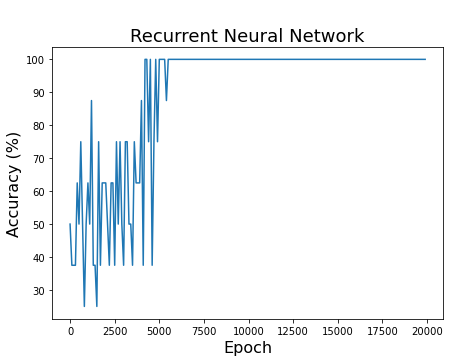

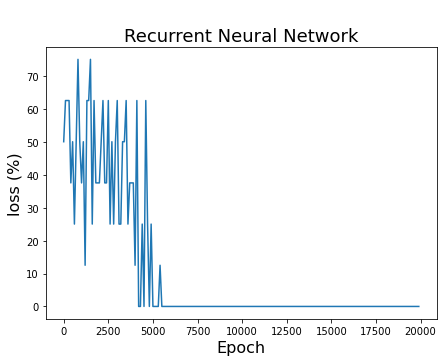

In [13]:
fig = plt.figure(figsize=(7,5))
epoch = np.arange(0,20000,100)
plt.plot(epoch,Acc,linestyle="solid")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy (%)",fontsize=16)
plt.title("\nRecurrent Neural Network",fontsize=18)
#plt.savefig('/Users/Anna/Desktop/RNN_Acc.png')
plt.show()

fig = plt.figure(figsize=(7,5))
epoch = np.arange(0,20000,100)
plt.plot(epoch,allError,linestyle="solid")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("loss (%)",fontsize=16)
plt.title("\nRecurrent Neural Network",fontsize=18)
#plt.savefig('/Users/vincent/Desktop/RNN_Loss.png')
plt.show()

In [1]:
for i in range(10):

    a_int = np.random.randint(largest_number/2)
    a = int2binary[a_int]
    b_int = np.random.randint(largest_number/2)
    b = int2binary[b_int]

    # true answer
    c_int = a_int + b_int
    c = int2binary[c_int]
    d = np.zeros_like(c)

    hidden_values = list()
    hidden_values.append(np.zeros(hidden_dim))
    for position in range(binary_dim):
        # generate input and output , move from right to left
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        # forward propagation
        hidden=sigmoid(np.dot(X,W_inputtohidden) + np.dot(hidden_values[-1],W_hiddenTohidden))
        # output layer (new binary representation)
        outputlayer = sigmoid(np.dot(hidden,W_hiddenToOutput))
        d[binary_dim - position - 1] = np.round(outputlayer[0][0])
        # store hidden layer foro BPTT
        hidden_values.append(hidden)


    out = 0
    for index,x in enumerate(reversed(d)):
        out += x*pow(2,index)

    # msg = '{:<5}{:^3}{:<5}{:^3}{:<5}'.format( a_int,"+", b_int,"=", out)
    # print(msg)
    # print("%-.5s + %-.5s = %-.5s" % (a_int, b_int, out))
    print(a_int, " + ",b_int," = ",out)

NameError: name 'np' is not defined